In [1]:
%matplotlib inline
#%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits

import synphot
print(synphot.__version__)

0.2.dev313


In [2]:
from synphot import units, SourceSpectrum, Empirical1D, Observation

from synphot import SpectralElement

v = SourceSpectrum.from_file('/grp/hst/cdbs/calspec/alpha_lyr_mod_002.fits')

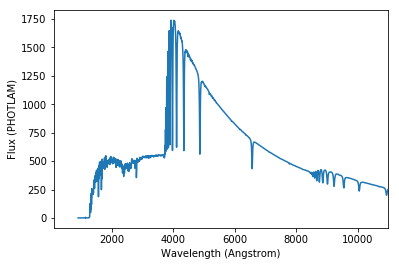

In [3]:
v.plot(left=100, right=11000)

In [4]:
paths = ['lte058.0-4.5-0.0a+0.0.BT-Settl.spec.fits']
filename = paths[0]

flux_unit = u.Watt/(u.m*u.m*u.micron)

#wavelength = (fits.getdata(paths[0])['Wavelength'] * u.um).to(u.Angstrom)
#hdu = fits.open(paths[0])

In [5]:
#flux = hdu[1].data['Flux'] * u.W / u.m**2 / u.um 

sp = SourceSpectrum.from_file(filename)

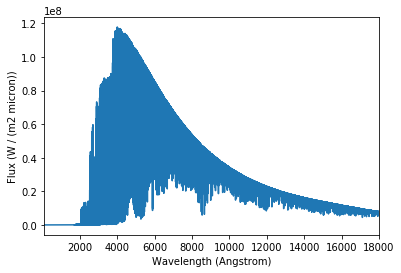

In [6]:
sp.plot(flux_unit=flux_unit, left=100, right=18000)

In [12]:
#f = units.convert_flux(wavelength, flux, units.FLAM, vegaspec=v)

In [7]:
bp_b = SpectralElement.from_file('GAIA_GAIA2.Gbp.dat.txt')
bp_r = SpectralElement.from_file('GAIA_GAIA2.Grp.dat.txt')

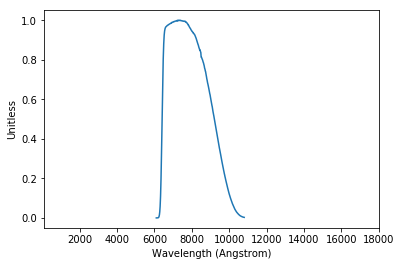

In [8]:
bp_r.plot(left=100, right=18000)

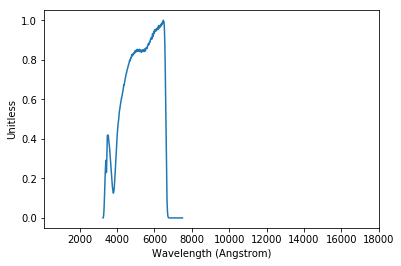

In [9]:
bp_b.plot(left=100, right=18000)

In [15]:
bp_r2 = bp_r.taper()
bp_b2 = bp_b.taper()

In [16]:
#sp = SourceSpectrum(Empirical1D, points=wavelength, lookup_table=f)

#force = 'taper'
obs_b = Observation(sp, bp_b2, binset=bp_b2.waveset) #, force=force)
obs_r = Observation(sp, bp_r2, binset=bp_r2.waveset) #, force=force)

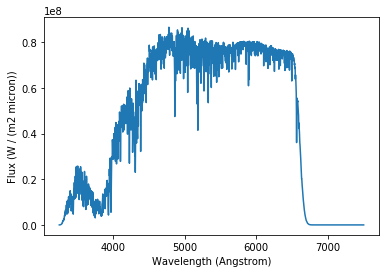

In [17]:
#plt.semilogx(wavelength.to(u.Angstrom), f)
#plt.semilogx(bp_b.model.points[0], bp_b.model.lookup_table * np.max(f))
#plt.semilogx(bp_r.model.points[0], bp_r.model.lookup_table * np.max(f))

obs_b.plot(flux_unit=flux_unit)

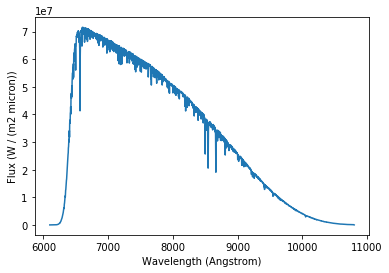

In [18]:
obs_r.plot(flux_unit=flux_unit)

In [19]:
obs_b.effstim('vegamag', vegaspec=v) - obs_r.effstim('vegamag', vegaspec=v)
# I got 0.66 vegamag, good enough?

<Quantity 0.65768242 VEGAMAG>

Measured B-R from Gaia for 51 Peg: 0.8170